In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv = "clean.csv"

base_df = pd.read_csv(csv)
base_df

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,C23-000-278-7237-3,3473.0,329160.0,1993.0,...,NaN,0.27,13.46,25.98582,-80.23586,146.0,True,HVHZ,X:100,NaN
224,120861813f1294d56,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,C23-000-207-1780-7,9000.0,924061.0,1941.0,...,627.0,0.71,7.25,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN
225,12089ed366ee68b8e,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,C55-000-585-3872-9,6650.0,274291.0,1929.0,...,359.0,1.23,6.33,30.67020,-81.53824,120.0,True,C,X:100,NaN
226,1211544028709F1DD,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,C68-000-867-0448-3,NaN,267400.0,1971.0,...,NaN,1.13,2.29,27.27514,-82.55399,130.0,True,B,A:100,NaN


In [3]:
house_df = base_df[["Id", "ValueofHome", "OwnerCity", "OwnerState", "PropertyLocationStreet1", "PropertyCity",
                    "PropertyZip", "YearBuilt", "TypeOfResidence"]]
house_df

,Id,ValueofHome,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,YearBuilt,TypeOfResidence
0,12009f31026acc440,360350.0,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,2001.0,SINGLE FAMILY
1,120112bfc77a87376,228680.0,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,2003.0,ATTACHED RESIDENTIAL
2,12081776a04b281f4,135000.0,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,1980.0,CONDO STACKED
3,12103fabafeea9fb7,87660.0,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,1959.0,CONDO STACKED
4,120213b0f5f17e3d1,663090.0,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,1991.0,CONDO STACKED
...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,329160.0,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,1993.0,SINGLE FAMILY
224,120861813f1294d56,924061.0,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,1941.0,SINGLE FAMILY
225,12089ed366ee68b8e,274291.0,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,1929.0,SINGLE FAMILY
226,1211544028709F1DD,267400.0,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,1971.0,CONDO ROW


In [33]:
house_type = house_df["TypeOfResidence"].value_counts()
house_type_df = pd.DataFrame(house_type)
house_type_df

,TypeOfResidence
SINGLE FAMILY,161
CONDO STACKED,39
ATTACHED RESIDENTIAL,16
CONDO ROW,8
CONDO UNIT,4


In [5]:
house_age = 2020 - house_df["YearBuilt"]
house_age

0      19.0
1      17.0
2      40.0
3      61.0
4      29.0
       ... 
223    27.0
224    79.0
225    91.0
226    49.0
227    53.0
Name: YearBuilt, Length: 228, dtype: float64

In [6]:
house_df["House Age"] = house_age
house_df

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,ValueofHome,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,YearBuilt,TypeOfResidence,House Age
0,12009f31026acc440,360350.0,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,2001.0,SINGLE FAMILY,19.0
1,120112bfc77a87376,228680.0,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,2003.0,ATTACHED RESIDENTIAL,17.0
2,12081776a04b281f4,135000.0,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,1980.0,CONDO STACKED,40.0
3,12103fabafeea9fb7,87660.0,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,1959.0,CONDO STACKED,61.0
4,120213b0f5f17e3d1,663090.0,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,1991.0,CONDO STACKED,29.0
...,...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,329160.0,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,1993.0,SINGLE FAMILY,27.0
224,120861813f1294d56,924061.0,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,1941.0,SINGLE FAMILY,79.0
225,12089ed366ee68b8e,274291.0,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,1929.0,SINGLE FAMILY,91.0
226,1211544028709F1DD,267400.0,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,1971.0,CONDO ROW,49.0


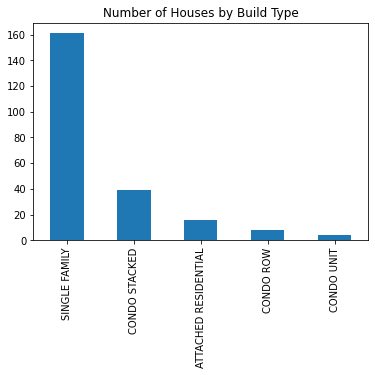

In [7]:
#bar chart of build types
house_type.plot(kind="bar", x="TypeOfResidence", y=house_type)
plt.title("Number of Houses by Build Type")
plt.savefig("houses by build type")

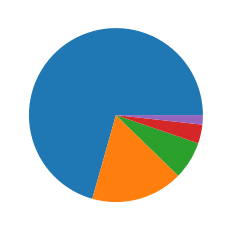

In [46]:
# # house_type_df.rename(columns={"TypeOfResidence": "# of Homes"})
plt.pie(house_type)
plt.show()

Text(0, 0.5, 'Value')

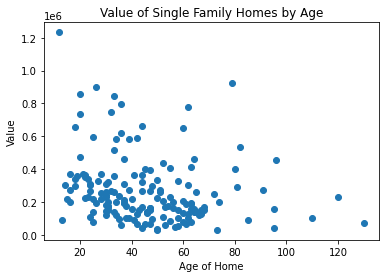

In [8]:
#scatter plot of value of houses by build type: Single Family
single_fam = house_df.loc[house_df["TypeOfResidence"]=="SINGLE FAMILY"]
# single_fam.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.xlim(0, 150)
# plt.ylim(0, 1400000)

sf_x = single_fam["House Age"]
sf_y = single_fam["ValueofHome"]
plt.scatter(sf_x, sf_y)
plt.title("Value of Single Family Homes by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")
# house_df.plot(kind="scatter",x="TypeOfResidence", y="ValueofHome")
# tick_locations = house_df["TypeOfResidence"]
# plt.xticks(tick_locations, rotation="vertical")

Text(0, 0.5, 'Value')

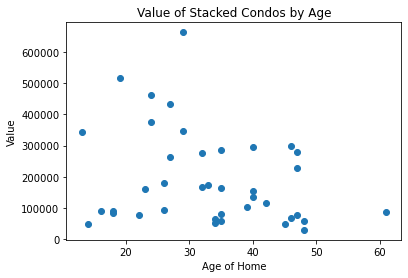

In [9]:
#scatter plot of value of houses by age: build type = Stacked Condo
# CORRECT
condo_stacked = house_df.loc[house_df["TypeOfResidence"]=="CONDO STACKED"]
condo_stacked
# condo_stacked.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.title("Value of Stacked Condos by Age")
# plt.xlabel=("Age of Home")
# plt.ylabel=("Value")

cs_x = condo_stacked["House Age"]
cs_y = condo_stacked["ValueofHome"]
plt.scatter(cs_x, cs_y)
plt.title("Value of Stacked Condos by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")

In [10]:
#scatter plot of value of houses by age: build type = Attached Residential
# attached_res = house_df.loc[house_df["TypeOfResidence"]=="ATTACHED RESIDENTIAL"]
# attached_res.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.title("Value of Attached Residential Homes by Age")
# plt.xlabel = ("Age of Home")
# plt.ylabel = ("Value")

In [11]:
# #scatter plot of value of houses by age: build type = Row Condo
# condo_row = house_df.loc[house_df["TypeOfResidence"]=="CONDO ROW"]
# condo_row.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.title("Value of Row Condos by Age")
# plt.xlabel = ("Age of Home")
# plt.ylabel = ("Value")

In [12]:
#scatter plot of value of houses by age: build type = Unit Condo
# unit_condo = house_df.loc[house_df["TypeOfResidence"]=="CONDO UNIT"]
# unit_condo.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.title("Value of Unit Condos by Age")
# plt.xlabel = ("Age of Home")
# plt.ylabel = ("Value")

In [13]:
year = house_df["YearBuilt"].value_counts()
year

1973.0    11
1990.0     8
1986.0     7
1985.0     7
1987.0     7
          ..
1944.0     1
1900.0     1
1940.0     1
1924.0     1
1971.0     1
Name: YearBuilt, Length: 71, dtype: int64

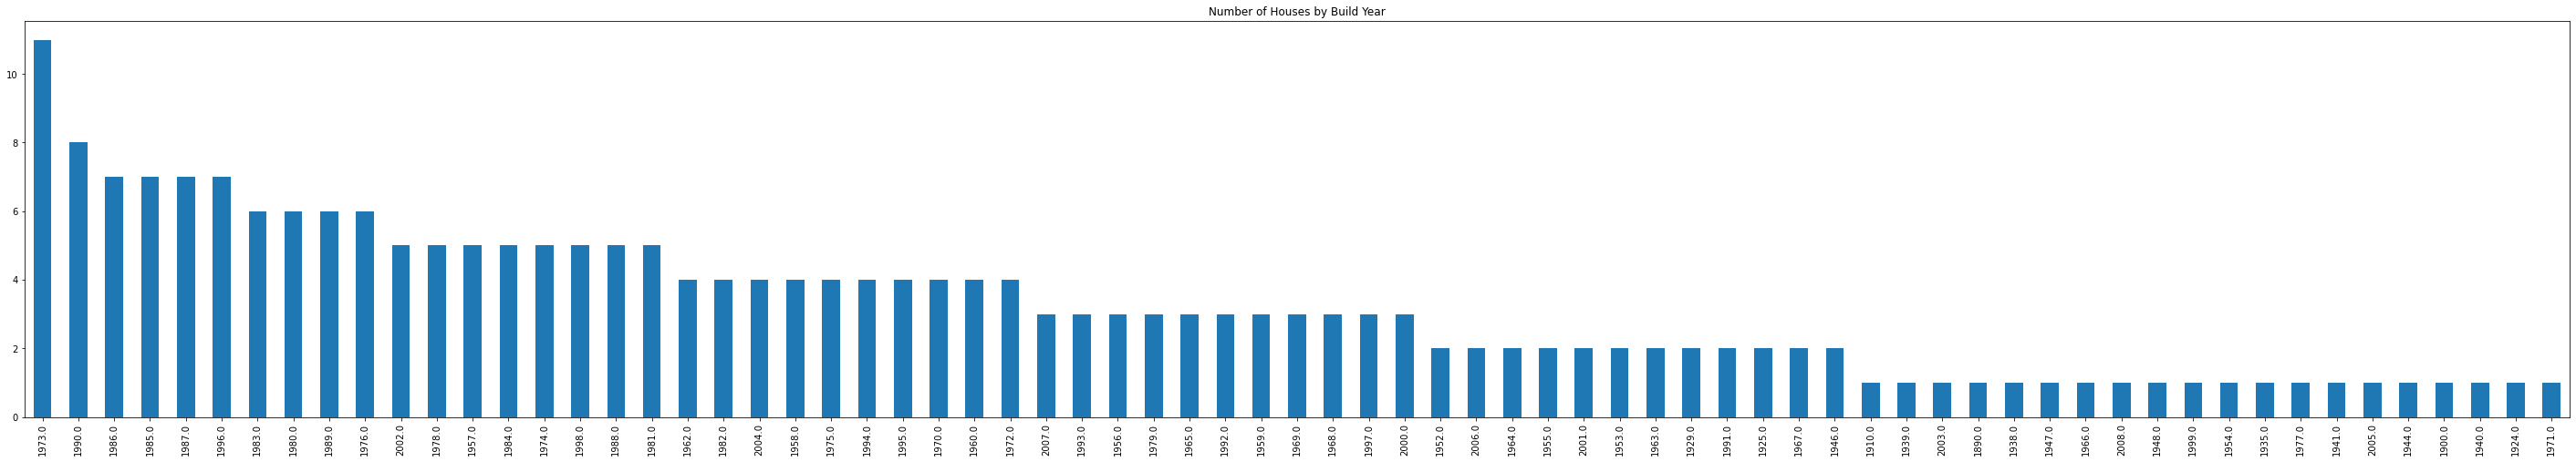

In [14]:
plt.figure(figsize=(50, 8))
year.plot(kind="bar", x="YearBuilt", y=year)
plt.title("Number of Houses by Build Year")
plt.tight_layout
plt.savefig("house by build year")

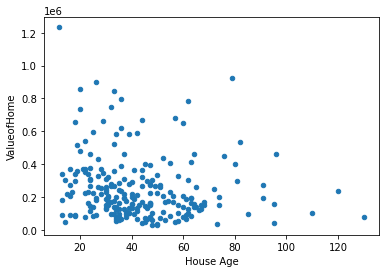

In [15]:
age_plot = house_df.plot.scatter(x="House Age", y="ValueofHome")
plt.xlabel = "Age of Home"
plt.ylabel = "Value"
age_plot